In [1]:
from dataset_utils import create_amazon_category_metadata, create_amazon_category
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

### Specify the category and the path to download the dataset
###### The list of categories can be found in AmazonCategoryMetadata.py

In [2]:
category = 'garden'
path_to_download = r"C:\Users\josep\Downloads\amazon_dataset"

### Create category to explore the data

In [3]:
amazon_category = create_amazon_category(create_amazon_category_metadata(),
                                         category,
                                         path_to_download)

### Download the images(only if you want to visualize it). 
###### This will take ~ 15 mins

In [ ]:
amazon_category.download_images()

### Product data

In [58]:
product_df = amazon_category.product_df
amazon_category.product_df.head()

,asin,title,price,imUrl,brand,description,categories,category,also_viewed,bought_together,also_bought
0,0981850006,"Primal Grill with Steven Raichlen, Volume One",NaN,http://ecx.images-amazon.com/images/I/51cNn5Dl...,None,Steven Raichlen's Best of Barbecue Primal Gril...,"[[Patio, Lawn & Garden, Grills & Outdoor Cooki...",garden,"[0761149430, 0761120149, B005GSHWXE, B005EMIXD...",NaN,NaN
1,144072007X,Sand Shark Margare Maron Audio CD,577.15,http://ecx.images-amazon.com/images/I/31B9X0S6...,Tesoro,The Tesoro Sand Shark metal combines time-prov...,"[[Patio, Lawn & Garden, Lawn Mowers & Outdoor ...",garden,"[B008WC0X0A, B000CPMOVG, B0046641AE, B00J150GA...",[B000H85WSA],NaN
2,1554701503,Napoleon's Everyday Plank Grilling,26.39,http://ecx.images-amazon.com/images/I/51cTWw9d...,Napoleon,This definitive guide to incorporating planks ...,"[[Patio, Lawn & Garden, Grills & Outdoor Cooki...",garden,"[1554701511, 1554702720]",[B0036Y9CH4],"[B0036Y9CH4, 1554702615, 1554701511, 1554700035]"
3,1579822932,Bad Kitty Backpack Pull,3.65,http://ecx.images-amazon.com/images/I/41nR62o%...,Bad Kitty,This is a Bad Kitty backpack pull clip.,"[[Patio, Lawn & Garden, Picnic Baskets & Acces...",garden,"[1250039479, 1250010160, 1250010349, B000V1U5Z...","[1596436700, 1596438444]","[1596438444, 1596436700, 1596436689, 031264121..."
4,1754164498,5 pound SpaGuard Enhanced Spa Shock,29.99,http://ecx.images-amazon.com/images/I/21cOwSPt...,SpaGuard,Every spa needs to be shocked to eliminate und...,"[[Patio, Lawn & Garden, Pools, Hot Tubs & Supp...",garden,"[B005EN5008, B007ZU4BV2, B002IT5JS4, B004RYFFH...","[B00AJZO9MQ, B002IT5JS4]","[B00AJZO9MQ, B006MHSEVW, B005EN5008, B006MHSKZ..."


### Review data(Users)

In [5]:
review_df = amazon_category.review_df
review_df.head()

,overall,reviewerID,asin,date,helpfulness_ratio
0,5,A20DWVV8HML3AW,0981850006,2013-06-13,0.000000
1,5,A2MH49GAEWEI95,0981850006,2014-03-23,0.000000
2,1,AR5DPX4ZU3D4Z,144072007X,2013-02-15,0.166667
3,5,A3OGMCRM3NL8OM,144072007X,2013-02-06,1.000000
4,5,A1NCJWD2ZQBXW2,1554701503,2013-02-03,0.000000


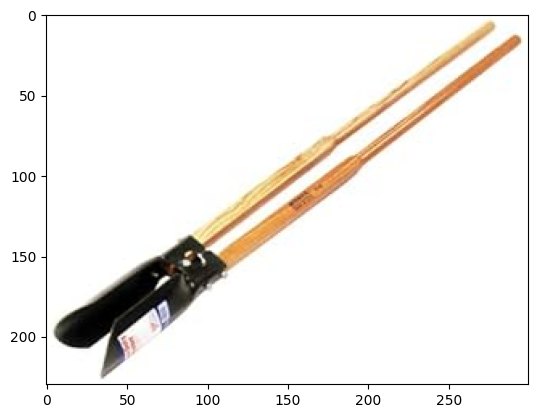

In [54]:
np.random.seed(40)
product = amazon_category.get_product('B00002N6BS')
image_path = product.get_image_path()
plt.imshow(plt.imread(image_path))

#### Display also viewed images

Number of valid products: 25
0: Product id: B000A1CKC0
1: Product id: B000FJOV4C
2: Product id: B000KL1ONG
3: Product id: B000B6Q6BA
4: Product id: B00002NCFY
5: Product id: B000HU3ZD2
6: Product id: B000QI3LD4
7: Product id: B00002N8OE
8: Product id: B000A26WMS
9: Product id: B003AZ6ABU


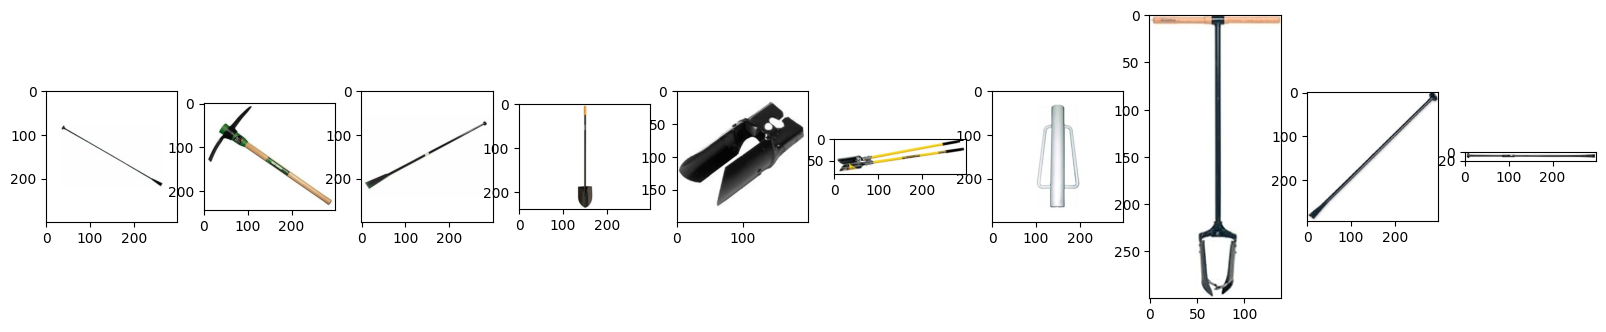

In [55]:
# Display an array of images
def plot_products(product_ids, max_products=10):
    product_ids = list(filter(lambda x: amazon_category.is_valid_product(x), product_ids))
    product_ids = list(filter(lambda x: os.path.exists(amazon_category.get_product(x).get_image_path()), product_ids))
    print("Number of valid products: {}".format(len(product_ids)))
    product_ids = np.random.choice(product_ids, max_products, replace=False)
    
    plt.figure(figsize=(20, 20))
    
    for i, product_id in enumerate(product_ids):
        print(f"{i}: Product id: {product_id}")
        product = amazon_category.get_product(product_id)
        plt.subplot(1, len(product_id), i + 1)
        plt.imshow(plt.imread(product.get_image_path()))
        
plot_products(product.get_also_viewed())

### Display also bought images

Number of valid products: 27
0: Product id: B000RWC6XK
1: Product id: B0032HQSDQ
2: Product id: B007E22C2G
3: Product id: B000QI3LD4
4: Product id: B000BYM1GQ
5: Product id: B002YPS1KK
6: Product id: B000ELWH4W
7: Product id: B00004S1YU
8: Product id: B000WOMYMG
9: Product id: B0007LXTT6


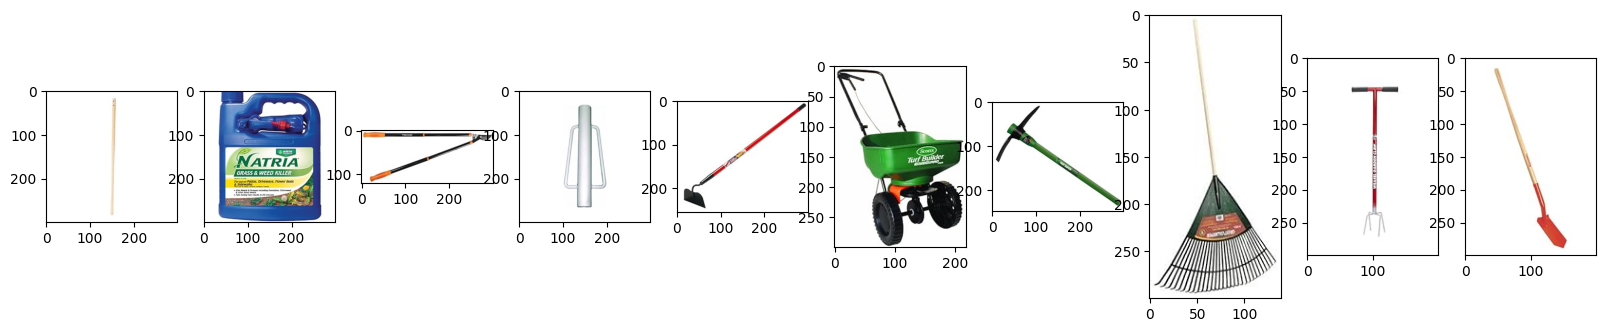

In [56]:
plot_products(product.get_also_bought())